41 0
42 0
43 0
54 1
55 1
66 2
67 2
68 2
75 3
76 3
77 3
87 4
88 4
101 5
102 5
113 6
114 6
123 7
124 7
133 8
134 8
146 9
147 9
156 10
157 10
166 11
167 11
176 12
177 12
185 13
186 13
194 14
195 14


<ipython-input-4-d36496fe7541>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
<ipython-input-4-d36496fe7541>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1
<ipython-input-4-d36496fe7541>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+2] -= 1


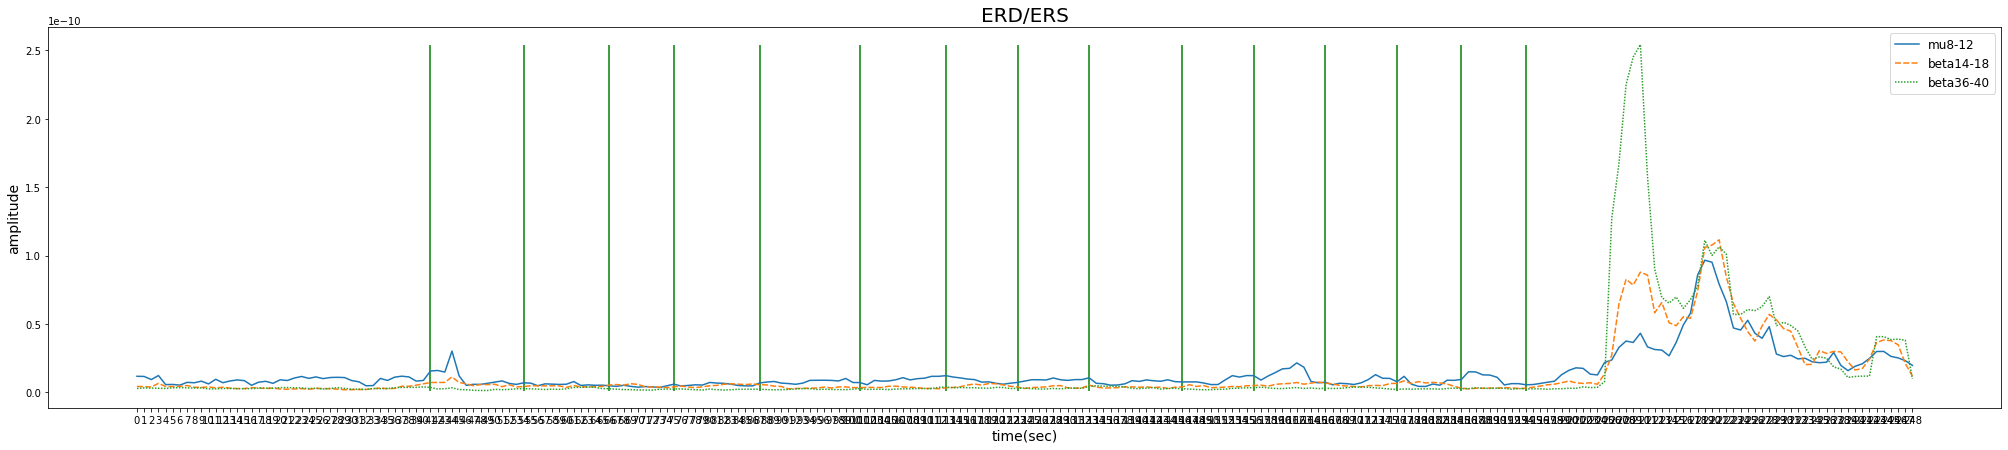

In [4]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime
 
df = pd.read_table('C:/MAVE_RawData/2022-06-13_오후 7_34/Fp1_FFT.txt',sep='\t',encoding = 'cp949')

df['mu8-12'] = 0
df['beta14-18'] = 0
df['beta36-40'] = 0
for i in range(1,len(df.columns)-3): # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 :
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=14 and float(df.columns[i][:-2])<18:
        df['beta14-18'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=36 and float(df.columns[i][:-2])<40:
        df['beta36-40'] += df[df.columns[i]]
        
# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open('C:/MAVE_RawData/2022-06-13_오후 7_34/ct.txt', "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            
# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35,7))

# Line graph by seaborn
ax = sns.lineplot(data=df[df.columns[-4:-1]])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0,len(df), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(len(df)) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
        min_ = [min(df['mu8-12']),min(df['beta14-18']),min(df['beta36-40'])]
        max_ = [max(df['mu8-12']),max(df['beta14-18']),max(df['beta36-40'])]
#         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     

In [3]:
df[df.columns[-4:]]

,mu8-12,beta14-18,beta36-40,click
0,2.438550e-11,5.881000e-12,7.544200e-12,0
1,4.768230e-11,6.473700e-12,7.537300e-12,0
2,4.621640e-11,7.176400e-12,7.106300e-12,0
3,4.661690e-11,6.694300e-12,6.580600e-12,0
4,2.748990e-11,4.845200e-12,5.635300e-12,0
...,...,...,...,...
208,1.479990e-11,2.793400e-12,4.010500e-12,0
209,1.589180e-11,3.900300e-12,4.109000e-12,0
210,1.525160e-11,4.051600e-12,5.328900e-12,0
211,1.300290e-11,4.713400e-12,6.563600e-12,0
